# Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


In [49]:
#Importing the packages required
library(ggplot2)
library(caTools)

In [50]:
#Importing the dataset
dataset=read.csv('student_scores.csv') 

In [51]:
print(dataset)

   Hours Scores
1    2.5     21
2    5.1     47
3    3.2     27
4    8.5     75
5    3.5     30
6    1.5     20
7    9.2     88
8    5.5     60
9    8.3     81
10   2.7     25
11   7.7     85
12   5.9     62
13   4.5     41
14   3.3     42
15   1.1     17
16   8.9     95
17   2.5     30
18   1.9     24
19   6.1     67
20   7.4     69
21   2.7     30
22   4.8     54
23   3.8     35
24   6.9     76
25   7.8     86


In [52]:
#Exploratory Data Analysis
summary(dataset)

     Hours           Scores     
 Min.   :1.100   Min.   :17.00  
 1st Qu.:2.700   1st Qu.:30.00  
 Median :4.800   Median :47.00  
 Mean   :5.012   Mean   :51.48  
 3rd Qu.:7.400   3rd Qu.:75.00  
 Max.   :9.200   Max.   :95.00  

In [53]:
#Splitting the dataset into training set and test set
set.seed(123)

In [54]:
split=sample.split(dataset$Scores,SplitRatio=0.8)

In [55]:
training_set=subset(dataset,split==TRUE)

In [56]:
test_set=subset(dataset,split==FALSE)


We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [57]:
#Fitting Simple Linear Regression to the Training Set
regressor=lm(formula=Scores~Hours,data=training_set)

In [58]:
summary(regressor)


Call:
lm(formula = Scores ~ Hours, data = training_set)

Residuals:
   Min     1Q Median     3Q    Max 
-8.489 -4.683  1.205  3.195  9.040 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.2086     2.5239   1.667    0.113    
Hours         9.3270     0.4913  18.986 2.36e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.263 on 18 degrees of freedom
Multiple R-squared:  0.9524,	Adjusted R-squared:  0.9498 
F-statistic: 360.5 on 1 and 18 DF,  p-value: 2.361e-13


In [59]:
#Predicting the Test set results
y_pred=predict(regressor,newdata=test_set)

In [60]:
y_pred

5       11       16       20       24 
36.85324 76.02682 87.21927 73.22871 68.56519

# Data Visualisation

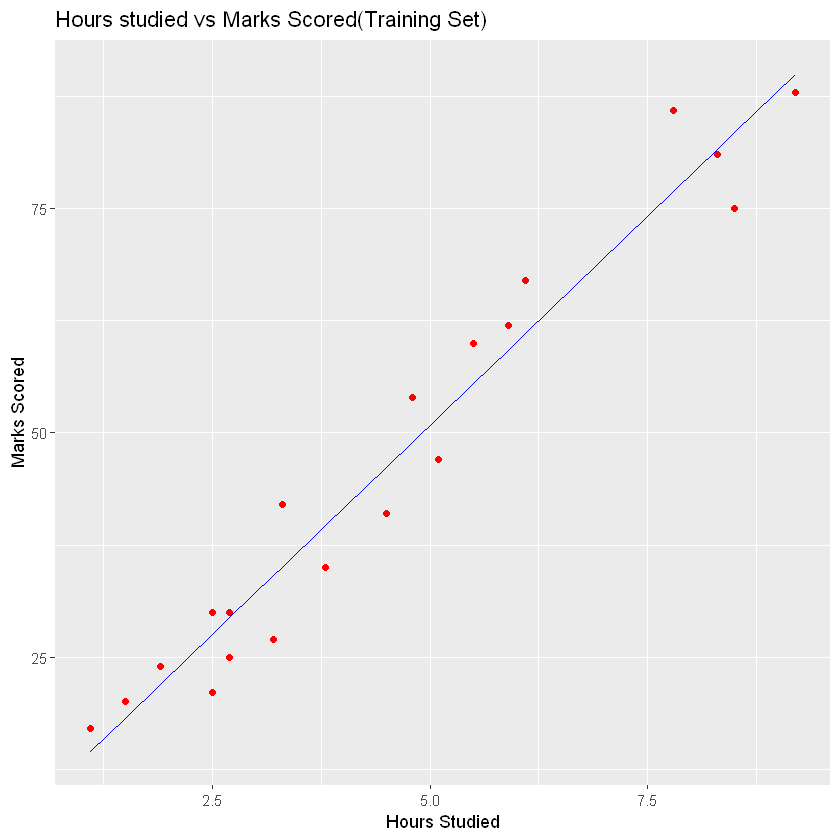

In [61]:
#Visualizing the Training set results
ggplot()+
  geom_point(aes(x=training_set$Hours,y=training_set$Scores),
             colour='red')+
  geom_line(aes(x=training_set$Hours,y=predict(regressor,newdata=training_set)),
            colour='blue')+
  ggtitle("Hours studied vs Marks Scored(Training Set)")+
  xlab("Hours Studied")+
  ylab("Marks Scored")

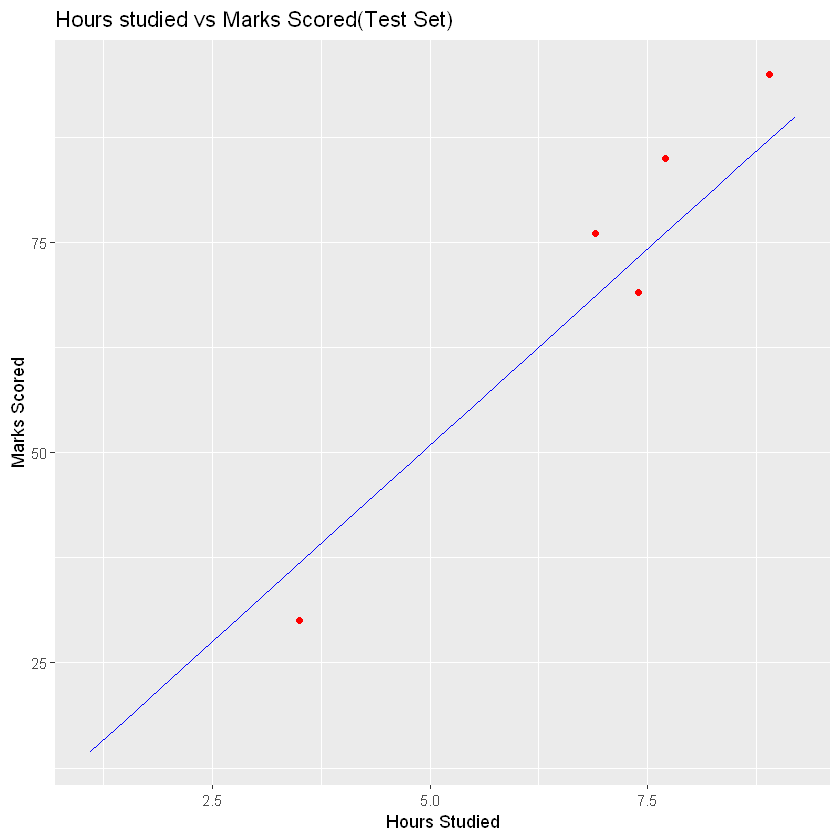

In [62]:
#Visualizing the Test set results
ggplot()+
  geom_point(aes(x=test_set$Hours,y=test_set$Scores),
             colour='red')+
  geom_line(aes(x=training_set$Hours,y=predict(regressor,newdata=training_set)),
            colour='blue')+
  ggtitle("Hours studied vs Marks Scored(Test Set)")+
  xlab("Hours Studied")+
  ylab("Marks Scored")

In [63]:
#Predicting scores
model<-lm(Scores~Hours,data=dataset)

In [64]:
summary(model)


Call:
lm(formula = Scores ~ Hours, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.578  -5.340   1.839   4.593   7.265 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.4837     2.5317   0.981    0.337    
Hours         9.7758     0.4529  21.583   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.603 on 23 degrees of freedom
Multiple R-squared:  0.9529,	Adjusted R-squared:  0.9509 
F-statistic: 465.8 on 1 and 23 DF,  p-value: < 2.2e-16


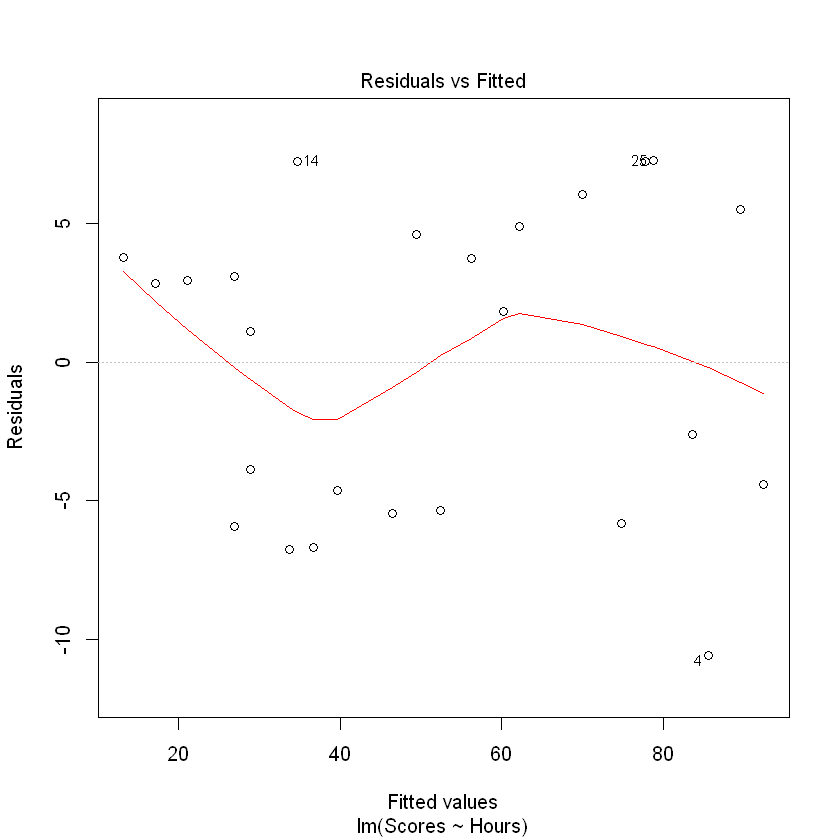

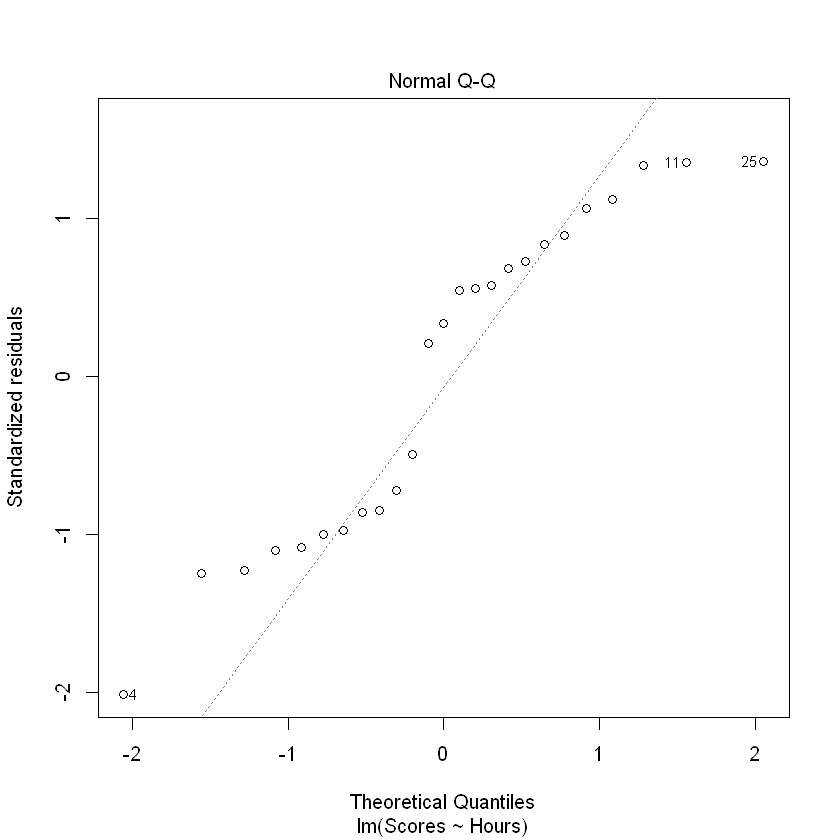

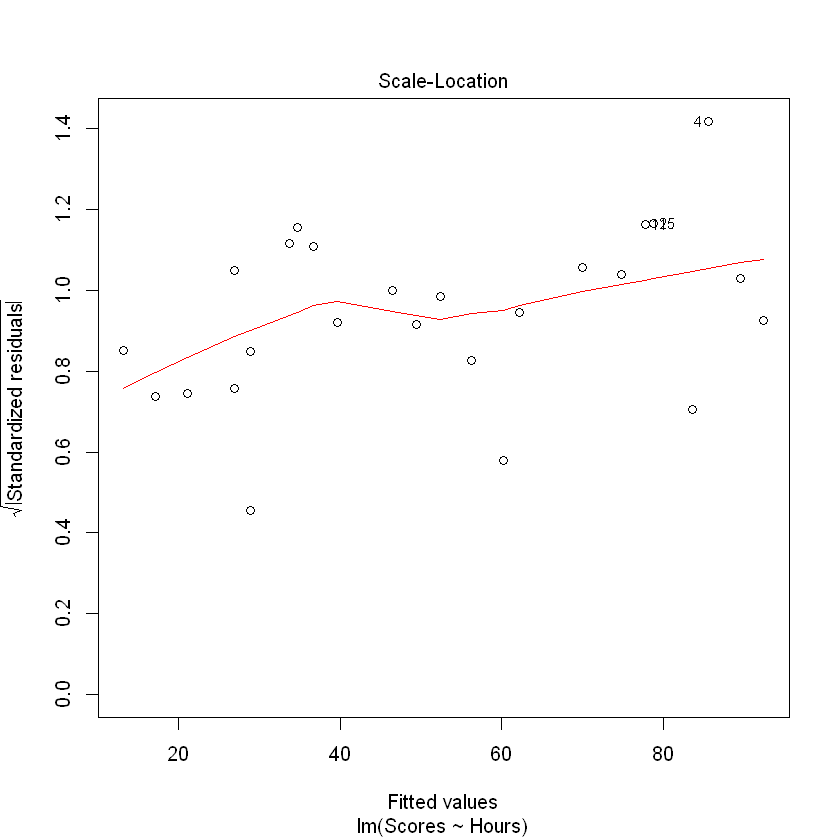

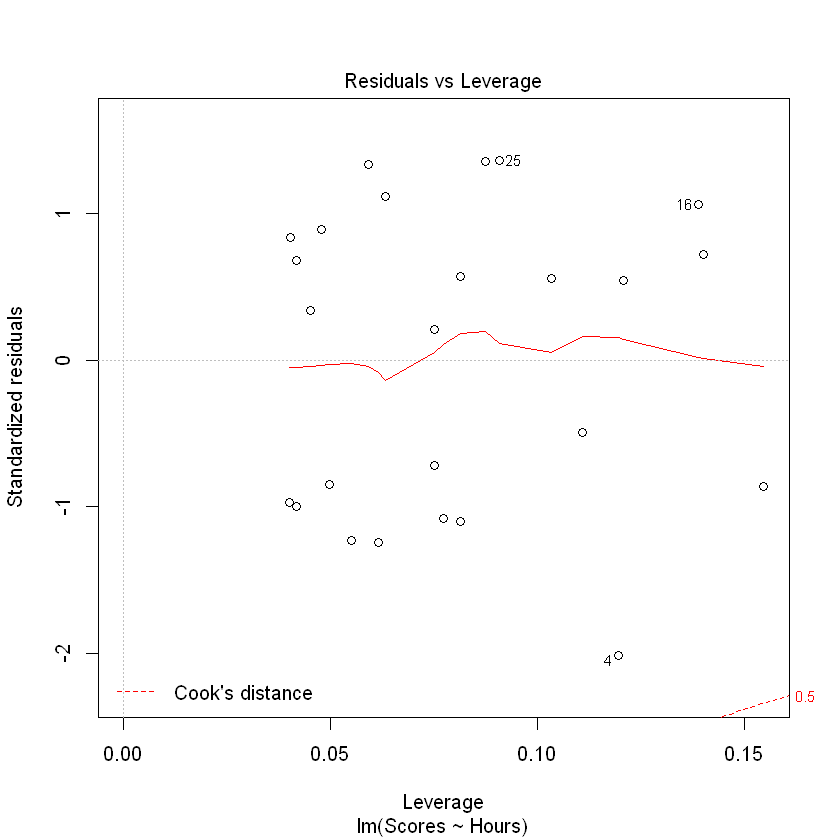

In [65]:
#plotting hours vs score
plot(model)


In [66]:
#predicting the score of a student who studies for  9.25 hours
predict(model,data.frame(Hours=9.25))

1 
92.90985

In [67]:
pred<-predict(model,newdata=dataset)

Data frame of Actual Values vs. Predicted Values

In [68]:
df=data.frame(dataset$Scores,pred)
df

dataset.Scores,pred
21,26.92318
47,52.34027
27,33.76624
75,85.57800
30,36.69899
20,17.14738
88,92.42106
60,56.25059
81,83.62284
25,28.87834


# Calculating Regression Model Accuracy
Mean  Square Error,Mean Absolute Error, Root Mean Square Error and R-Square

In [69]:
#error
error<-pred-dataset$Scores
error

1         2         3         4         5         6         7         8 
 5.923182  5.340271  6.766244 10.578002  6.698985 -2.852622  4.421065 -3.749408 
        9        10        11        12        13        14        15        16 
 2.622842  3.878343 -7.242640 -1.839087  5.474789 -7.256175 -3.762943 -5.511676 
       17        18        19        20        21        22        23        24 
-3.076818 -2.942300 -4.883926  5.824618 -1.121657 -4.592470  4.631726 -6.063283 
       25 
-7.265060

In [70]:
#Mean  Square Error
mse<-mean((error)^2)
mse

[1] 28.88273

In [71]:
#Mean Absolute Error
mae<-mean(abs(error))
mae

[1] 4.972805

In [72]:
#Residual Mean  Square Error
rmse<-sqrt(mse)
rmse

[1] 5.374266

In [73]:
#R-square
R2 = 1-(sum((error)^2)/sum((dataset$Scores-mean(dataset$Scores))^2))
R2

[1] 0.9529482